<a href="https://colab.research.google.com/github/nidhithakare1207/BML-Practicals/blob/main/Experiment_No_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 11 : Random Forest as Bagging ensemble technique.

In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart (1).csv to heart (1).csv


In [ ]:
file_name = next(iter(uploaded))
print("Loaded file:", file_name)

df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("\nFirst 5 rows of data:")
print(df.head())

print("\nColumns in dataset:")
print(df.columns)

Loaded file: heart (1).csv

First 5 rows of data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Columns in dataset:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
target_column = 'target'

if target_column not in df.columns:
    raise ValueError(f"'{target_column}' column not found in dataset. Please change 'target_column' variable.")

X = df.drop(columns=[target_column])
y = df[target_column]

print("\nFeature shape:", X.shape)
print("Target shape:", y.shape)



Feature shape: (1025, 13)
Target shape: (1025,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    max_depth=None,
    random_state=42,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\n=== Evaluation on Test Data ===")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


=== Evaluation on Test Data ===
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
[[100   0]
 [  0 105]]


In [ ]:
print("\nOut-of-bag Score (approx. generalization accuracy):", rf_model.oob_score_)


Out-of-bag Score (approx. generalization accuracy): 0.9939024390243902


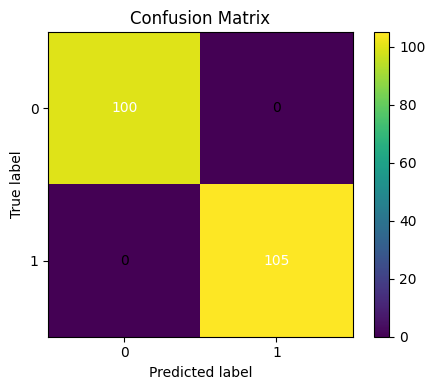

In [ ]:
plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted label')
plt.ylabel('True label')


thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

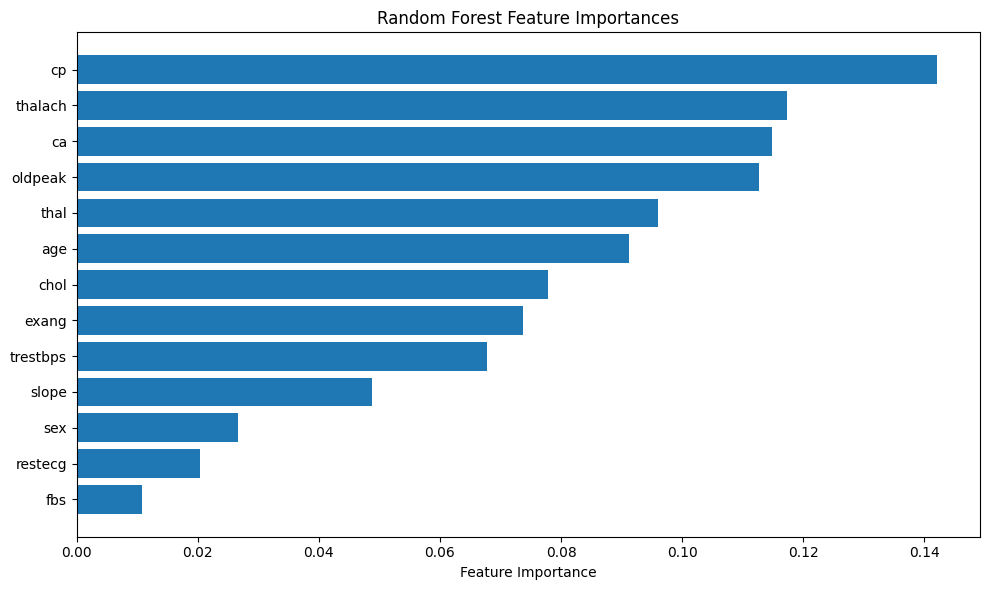

In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


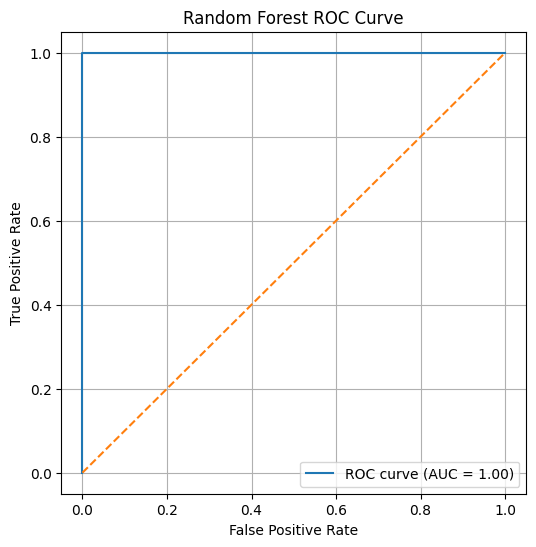

In [ ]:
if len(np.unique(y)) == 2:

    pos_label = np.max(np.unique(y))
    y_proba = rf_model.predict_proba(X_test)[:, list(rf_model.classes_).index(pos_label)]

    fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Random Forest ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
    print("\nROC curve not plotted because this is not a binary classification problem.")